In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [8]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [9]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


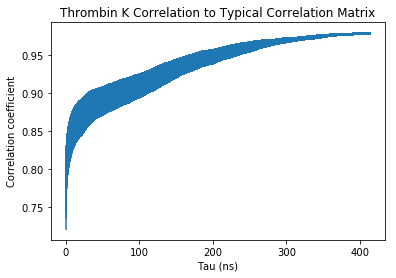

In [10]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('Thrombin K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinK_prop_max_correlation_to_equaltime.png')

Bars are standard error

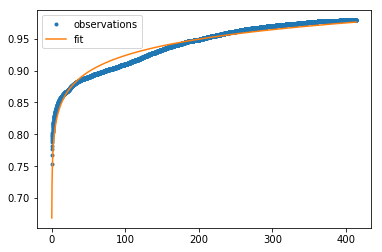

In [11]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.0368769*log(x) + 0.7537728
yhat = 0.0368769*np.log(taus) + 0.7537728
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_ThrombinK_prop_max_correlation_to_equaltime.png')

$$y = 0.0368769*log(x) + 0.7537728$$

[ -3.72488123e+01   1.70163052e-03   3.81062853e+01   1.67763196e-03]


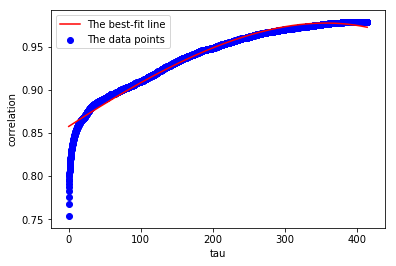

In [13]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(0.75,0.04,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_ThrombinK_prop_max_correlation_to_equaltime.png')

$$y = -3.72488123\times10^{1} e^{1.70163052\times10^{-3}x} + 3.81062853\times10^{1} e^{1.67763196\times10^{-3}x}$$

[ -3.98574038e+01   1.54253449e-03   4.07235273e+01   1.52163352e-03
  -7.32410082e-02  -1.36025948e-01]


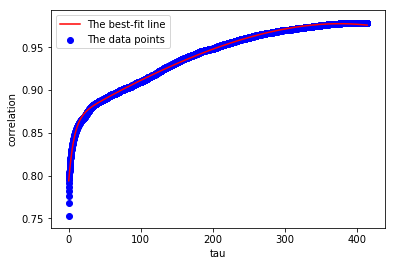

In [15]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-30.7,0.0017,38,.0017,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_ThrombinK_prop_max_correlation_to_equaltime.png')

$$y = -3.98574038\times10^{1} e^{1.54253449\times10^{-3}x} + 4.07235273\times10^{1} e^{1.52163352\times10^{-3}x} + -7.32410082\times10^{-2} e^{-1.36025948\times10^{-1}}$$

# Time Lagged

In [16]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

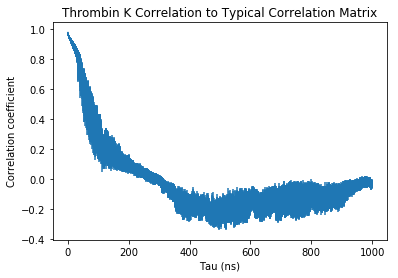

In [17]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('Thrombin K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinK_TL_correlation_to_equaltime.png')

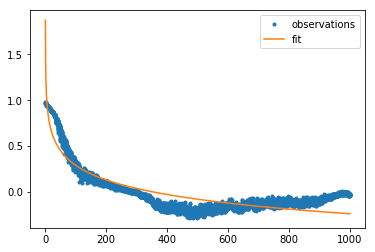

In [18]:
np.polyfit(np.log(TLtaus), TLaverage, 1)
#y = -0.22904136*log(x) + 1.34477927
yhat = -0.22904136*np.log(TLtaus) + 1.34477927
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = -0.22904136*log(x) + 1.34477927$$

[  5.09920923e+01  -3.79140591e-03  -5.00227314e+01  -3.70936355e-03]


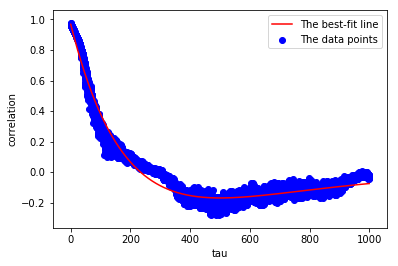

In [19]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = 5.09920923\times10^{1} e^{-3.79140591\times10^{-3}x} + -5.00227314\times10^{1} e^{-3.70936355\times10^{-3}x}$$

[  1.15882590e+00  -8.11526871e-03  -2.64654365e+00   1.94747341e-03
   2.50666526e+00   2.00187136e-03]


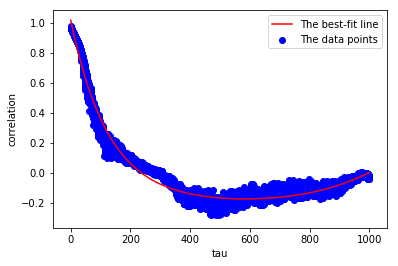

In [21]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_ThrombinK_TL_correlation_to_equaltime.png')

$$y = 1.15882590 e^{-8.11526871\times10^{-3}x} + -2.64654365 e^{1.94747341\times10^{-3}x} + 2.50666526 e^{2.00187136\times10^{-3}}$$